# Digit Recognizer

## Machine Learning

In this notebook, I will try to use sklearn to implement machine learning in digit recognizer via two methods: SVM and K-nearest neighbors. 

---
## 1. Load The Data

In [29]:
# Load data
import csv
import numpy as np
from sklearn.model_selection import train_test_split

# define a function that translat the string into float in the array
def trans_str2float(strlist):
    floatlist = []
    for i in range(len(strlist)):
        floatlist.append([])
        for j in range(len(strlist[i])):
            floatlist[i].append([])
            for k in range(len(strlist[i][j])):
                floatlist[i][j].append(float(strlist[i][j][k]))      
    return list(floatlist)

X_str = []
Y = []
with open('./data/train.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        Y.append(line[0])
        image = np.array(line[1:])
        image = image.reshape((28,28))
        X_str.append(image)
    del X_str[0]
    del Y[0]

x_test_str = []
y_test = []
with open('./data/test.csv') as csvfile:
    lines = csv.reader(csvfile)
    for line in lines:
        image = np.array(line)
        image = image.reshape((28,28))
        x_test_str.append(image)
    del x_test_str[0]

X = trans_str2float(X_str)
x_test = trans_str2float(x_test_str)
y_test = np.zeros(len(x_test))

# split the train data into training and validation part to avoid overfitting
# validation set takes 20% data from the whole training data 
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.2, random_state=1)

---

## 2. Dataset Summary & Exploration

### Provide a Basic Summary of the Data Set

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = str(len(x_train[0])) + '*' + str(len(x_train[0][0])) + '*' + str(1)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 33600
Number of validation examples = 8400
Number of testing examples = 28000
Image data shape = 28*28*1
Number of classes = 10


### Include an exploratory visualization of the dataset

5


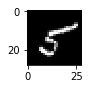

In [28]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0,len(x_test))
image = x_train[index]

plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')
print(y_train[index])

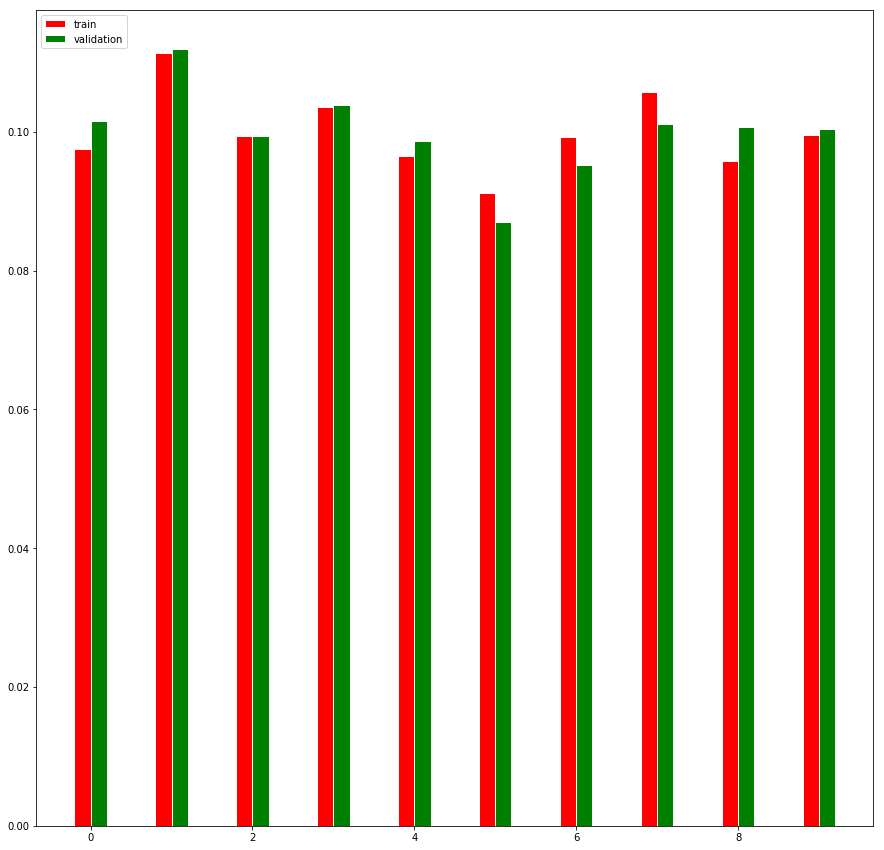

In [32]:
### show the data in picture
import copy

def datacount(data):
    number = []
    count = copy.deepcopy(data)
    count.sort()
    for i in range(9):
        a = count.index(str(i+1))-count.index(str(i))
        number.append(a)
        
    a = len(count)-count.index(str(9))
    number.append(a)
    return number

signs = np.arange(10)
plt.figure(figsize=(15,15))
percent_train = np.divide(datacount(y_train),len(y_train))
percent_valid = np.divide(datacount(y_valid),len(y_valid))
# percent_test = np.divide(datacount(y_test),len(y_test))
plt.bar(signs-0.1, percent_train, width = 0.2, fc = 'r', edgecolor = 'white', label='train', lw=1)
plt.bar(signs+0.1, percent_valid, width = 0.2, fc = 'g', edgecolor = 'white', label='validation', lw=1)
# plt.bar(signs+0.25, percent_test, width = 0.25, fc = 'b', edgecolor = 'white', label='test', lw=1)
plt.legend(loc="upper left")
plt.savefig('./pictures/data_bar.jpg')
plt.show()

In [47]:
### show the data in table

print("{0:<3}".format("SignName"), "{0:10}".format("  Training "),"{0:10}".format(" Validation"))
for j in range(10):
    print('   {0:<3}'.format(j),
          "{0:10.2f}%".format(percent_train[j]*100 ),"{0:10.2f}%".format(percent_valid[j]*100 ))

SignName   Training   Validation
   0         9.76%      10.15%
   1        11.14%      11.19%
   2         9.95%       9.94%
   3        10.35%      10.39%
   4         9.65%       9.87%
   5         9.12%       8.70%
   6         9.93%       9.52%
   7        10.57%      10.12%
   8         9.57%      10.07%
   9         9.96%      10.04%


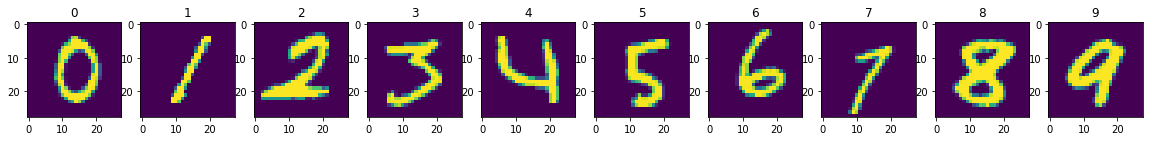

In [54]:
### visualize all the examples

fig = plt.figure(figsize=(20,20))

for i in range(10):
    y = list(y_train)
    index = y.index(str(i))
    fig.add_subplot(5,10,i+1)
    fig.add_subplot(5,10,i+1).set_title(str(i))
    plt.imshow(x_train[index])

----

## 3. Data processing

To train the codel more effectively, I will do some pre-processing (normalization).

The image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

In [57]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# normalized the pixels
x_train = (np.array(x_train)-128.0)/128.0
x_valid = (np.array(x_valid)-128.0)/128.0
x_test = (np.array(x_test)-128.0)/128.0